<a href="https://colab.research.google.com/github/JieUpup/BreastCancerProjectForData-Mining/blob/main/FinalProject_BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataSet Link: 

https://www.kaggle.com/code/malik12345/breast-cancer-detection-using-ml/input


This data set is taken from https://data.world/health/breast-cancer-wisconsin by the Donor: Nick Street and the Source: UCI - Machine Learning Repository.

Topic: Breat Cancer Detection using ML methods

#Some definition in this project:
1. Breast Cancer
2. Two main type of Breast Cancer: Malignant, Benign



## Motivation

I choose this topic because I heard so many cases about this disease in real life. 





   

## My goal


I hope I can learn more from this project and improve the data mining techniques and optimize the algorithms for this model to let the prediction and detection is more presisely. Also it is a good chance to read research papers which are related with this topic, it should be benifit to understand the domain concepts and techonologies for Machines Learning and NLP course.












* Evaluation Model performance :  improve accuracy, K-fold cross validation




## Table of contents



# **1. Set up the enviroment and necessary libraries .**

In [26]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR, CyclicLR
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight


from glob import glob
from skimage.io import imread
from os import listdir

import time
import copy
from tqdm import tqdm_notebook as tqdm

In [ ]:
!pip install -U scikit-learn==0.21.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/base_command.py", line 160, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/req_command.py", line 241, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/commands/install.py", line 419, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 481, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 348, in resolv

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [28]:
import pandas as pd
import os

!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
openjdk-8-jdk-headless is already the newest version (8u362-ga-0ubuntu1~20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [4]:
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

Stage 1: data read and process: 

Read data from persnal google drive
Check how to read data from google drive and create the data frame

In [29]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [30]:
import pandas as pd

# replace "/content/drive/My Drive" with the path to the directory containing your dataset
path = "/content/drive/My Drive/data/data.csv"

# read the dataset using pandas
df = pd.read_csv(path)



Play Around and take a look of data simple: there are 5 rows and 32 columns

In [31]:
# take a look
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:

# check the columns
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [33]:
# check the numbers of columns
len(df.columns)

32

In [34]:
# get data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [35]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [36]:
# use groupby to formatted data
df.groupby('diagnosis').size()

# M means Maglinant, it is a type cancer and need do treatment immediately .
# B means Blign, it is a type cancer and might not need the treatment.

diagnosis
B    357
M    212
dtype: int64

In [ ]:
# all data type is float. if not, print message
for i in df:
    try:
        i = float(i)
        print(i)
    except:
        print("Invalid data.")

Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.
Invalid data.


In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [37]:
import pandas as pd

# replace "/content/drive/My Drive" with the path to the directory containing your dataset
path = "/content/drive/My Drive/data/data.csv"

# read the dataset using pandas
df = pd.read_csv(path)


In [38]:
# show head of two data
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [39]:

# drop some unnecessary feature, such as 'ID'
df.drop("id",axis=1,inplace=True)

In [40]:
# prunt some necessay constant value for the data set.
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [41]:
# mapping data type with the 1 and 0 to represent types.
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [ ]:
# We can see some null value so far, need to handle it.
df.describe() 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,0.0,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,NaN,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: ylabel='count'>

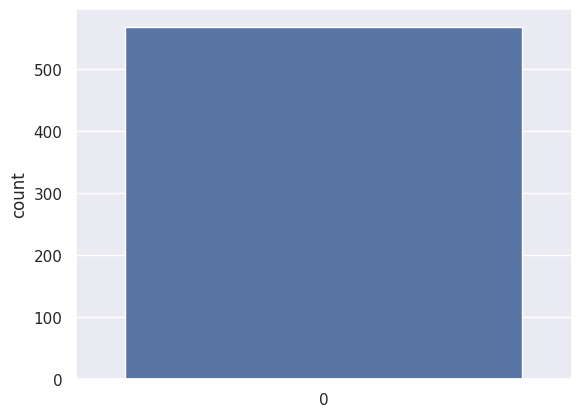

In [42]:
# display the data as two demension.( here is the issure, can't find a good fit size to display)
sns.countplot(df['diagnosis'],label="Count")
# Because diagnosis columns has many null value, we need to handle it first and then plot.

<Axes: >

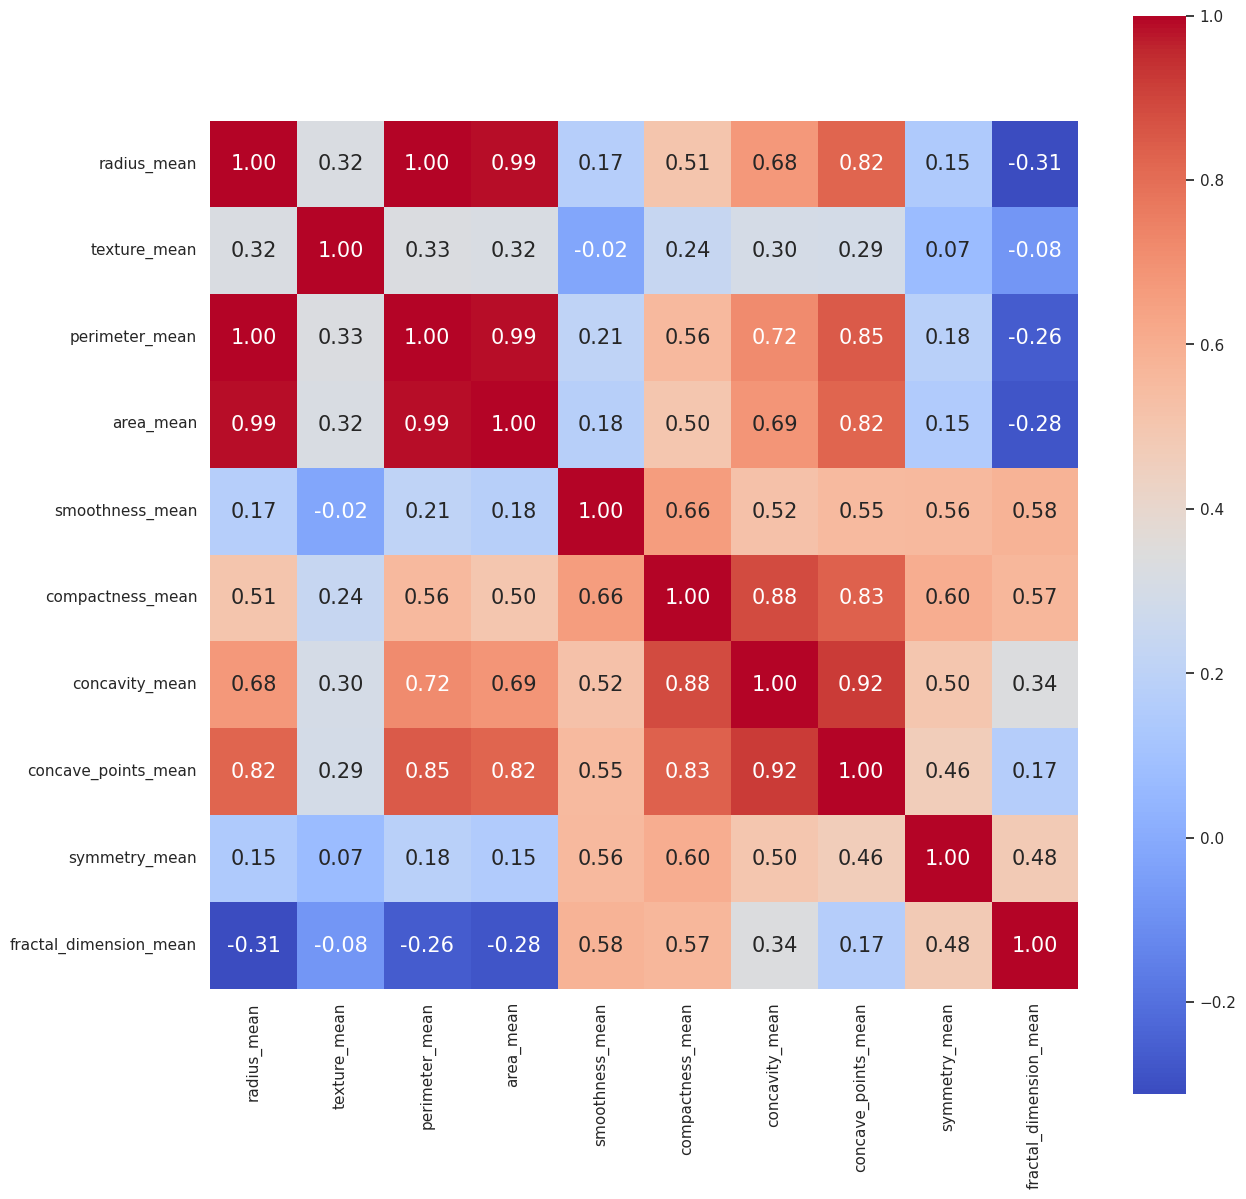

In [43]:
# using  Pandas library and Seaborn library in Python to create a heatmap of a correlation matrix.

# 1)Selects a subset of columns from a Pandas DataFrame called 'df' using the variable 'features_mean'.
# 2)Computes the correlation between these columns using the Pandas corr() method and stores the resulting correlation matrix in the variable 'corr'.
# 3)creates a square figure with a size of 14 by 14 using the Seaborn plt.figure() function.
# uses the Seaborn heatmap() function to create a heatmap of the correlation matrix with the following arguments:


# Heatmap is a good way to explore the features or variblas relationships to show corrlation or ircorrlation.
# Also we can use heatmap to drom some unnecessary features.
corr = df[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')


In [81]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd


# Separate features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create a RandomForestClassifier model with 100 estimators
model = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable using the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)



Accuracy: 0.9680851063829787


In [83]:
#replaces the values in the "diagnosis" column of a pandas DataFrame df. The values "M" and "B" are replaced with 1 and 0, respectively. This is a common preprocessing step when working with binary classification problems where the labels are in string format.
df['diagnosis']=df['diagnosis'].replace(['M', 'B'],[1,0])

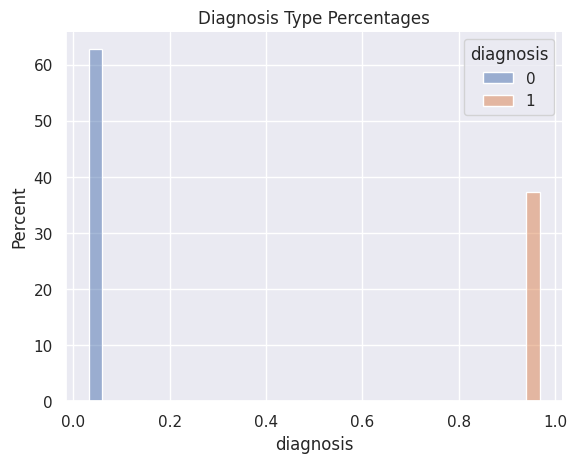

In [84]:
# Using the seaborn library to create a histogram plot of the diagnosis column in a DataFrame
g = sns.histplot(x = 'diagnosis',data = df, hue ='diagnosis', shrink = 0.3, stat = 'percent')
g.set_title("Diagnosis Type Percentages")
sns.despine()

In [55]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [56]:
# train-test split on a given dataset "df" with a test size of 0.3, 
# meaning that 30% of the data will be used for testing and the remaining 70% for training. 
# The split is random, and the resulting train and test datasets are returned and stored in the variables "train" and "test", respectively.
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [57]:

# Handle the missing value and null value. 
# It is a part of data preprocessing and machine learning model training on a dataset.

#replaces any occurrences of positive or negative infinity in the dataframe df with np.nan. 


df.replace([np.inf, -np.inf], np.nan, inplace=True) 
#fills in any remaining NaN (null) values with the value 999. 
df.fillna(999, inplace=True)
#fills in any remaining NaN values with 0.
df.fillna(0, inplace=True)
#split the data into training and testing sets, with the prediction_var variable representing the features to use for prediction. train_X, train_y, test_X, and test_y are then assigned the appropriate subsets of the data.

train_X = train[prediction_var]
train_y = train.diagnosis
test_X= test[prediction_var]
test_y = test.diagnosis

#check if there are any NaN values remaining in the dataframe.
df.isnull().any().any()
# call to df.isnull().any().any() returns a boolean value indicating whether there are any NaN values present in the entire dataframe, while the second call to df.isnull().any() returns a boolean array indicating which columns contain NaN values. 

df.isnull().any()


diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave_points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave_points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave_points_worst       False
symmetry_worst             False
fractal_di

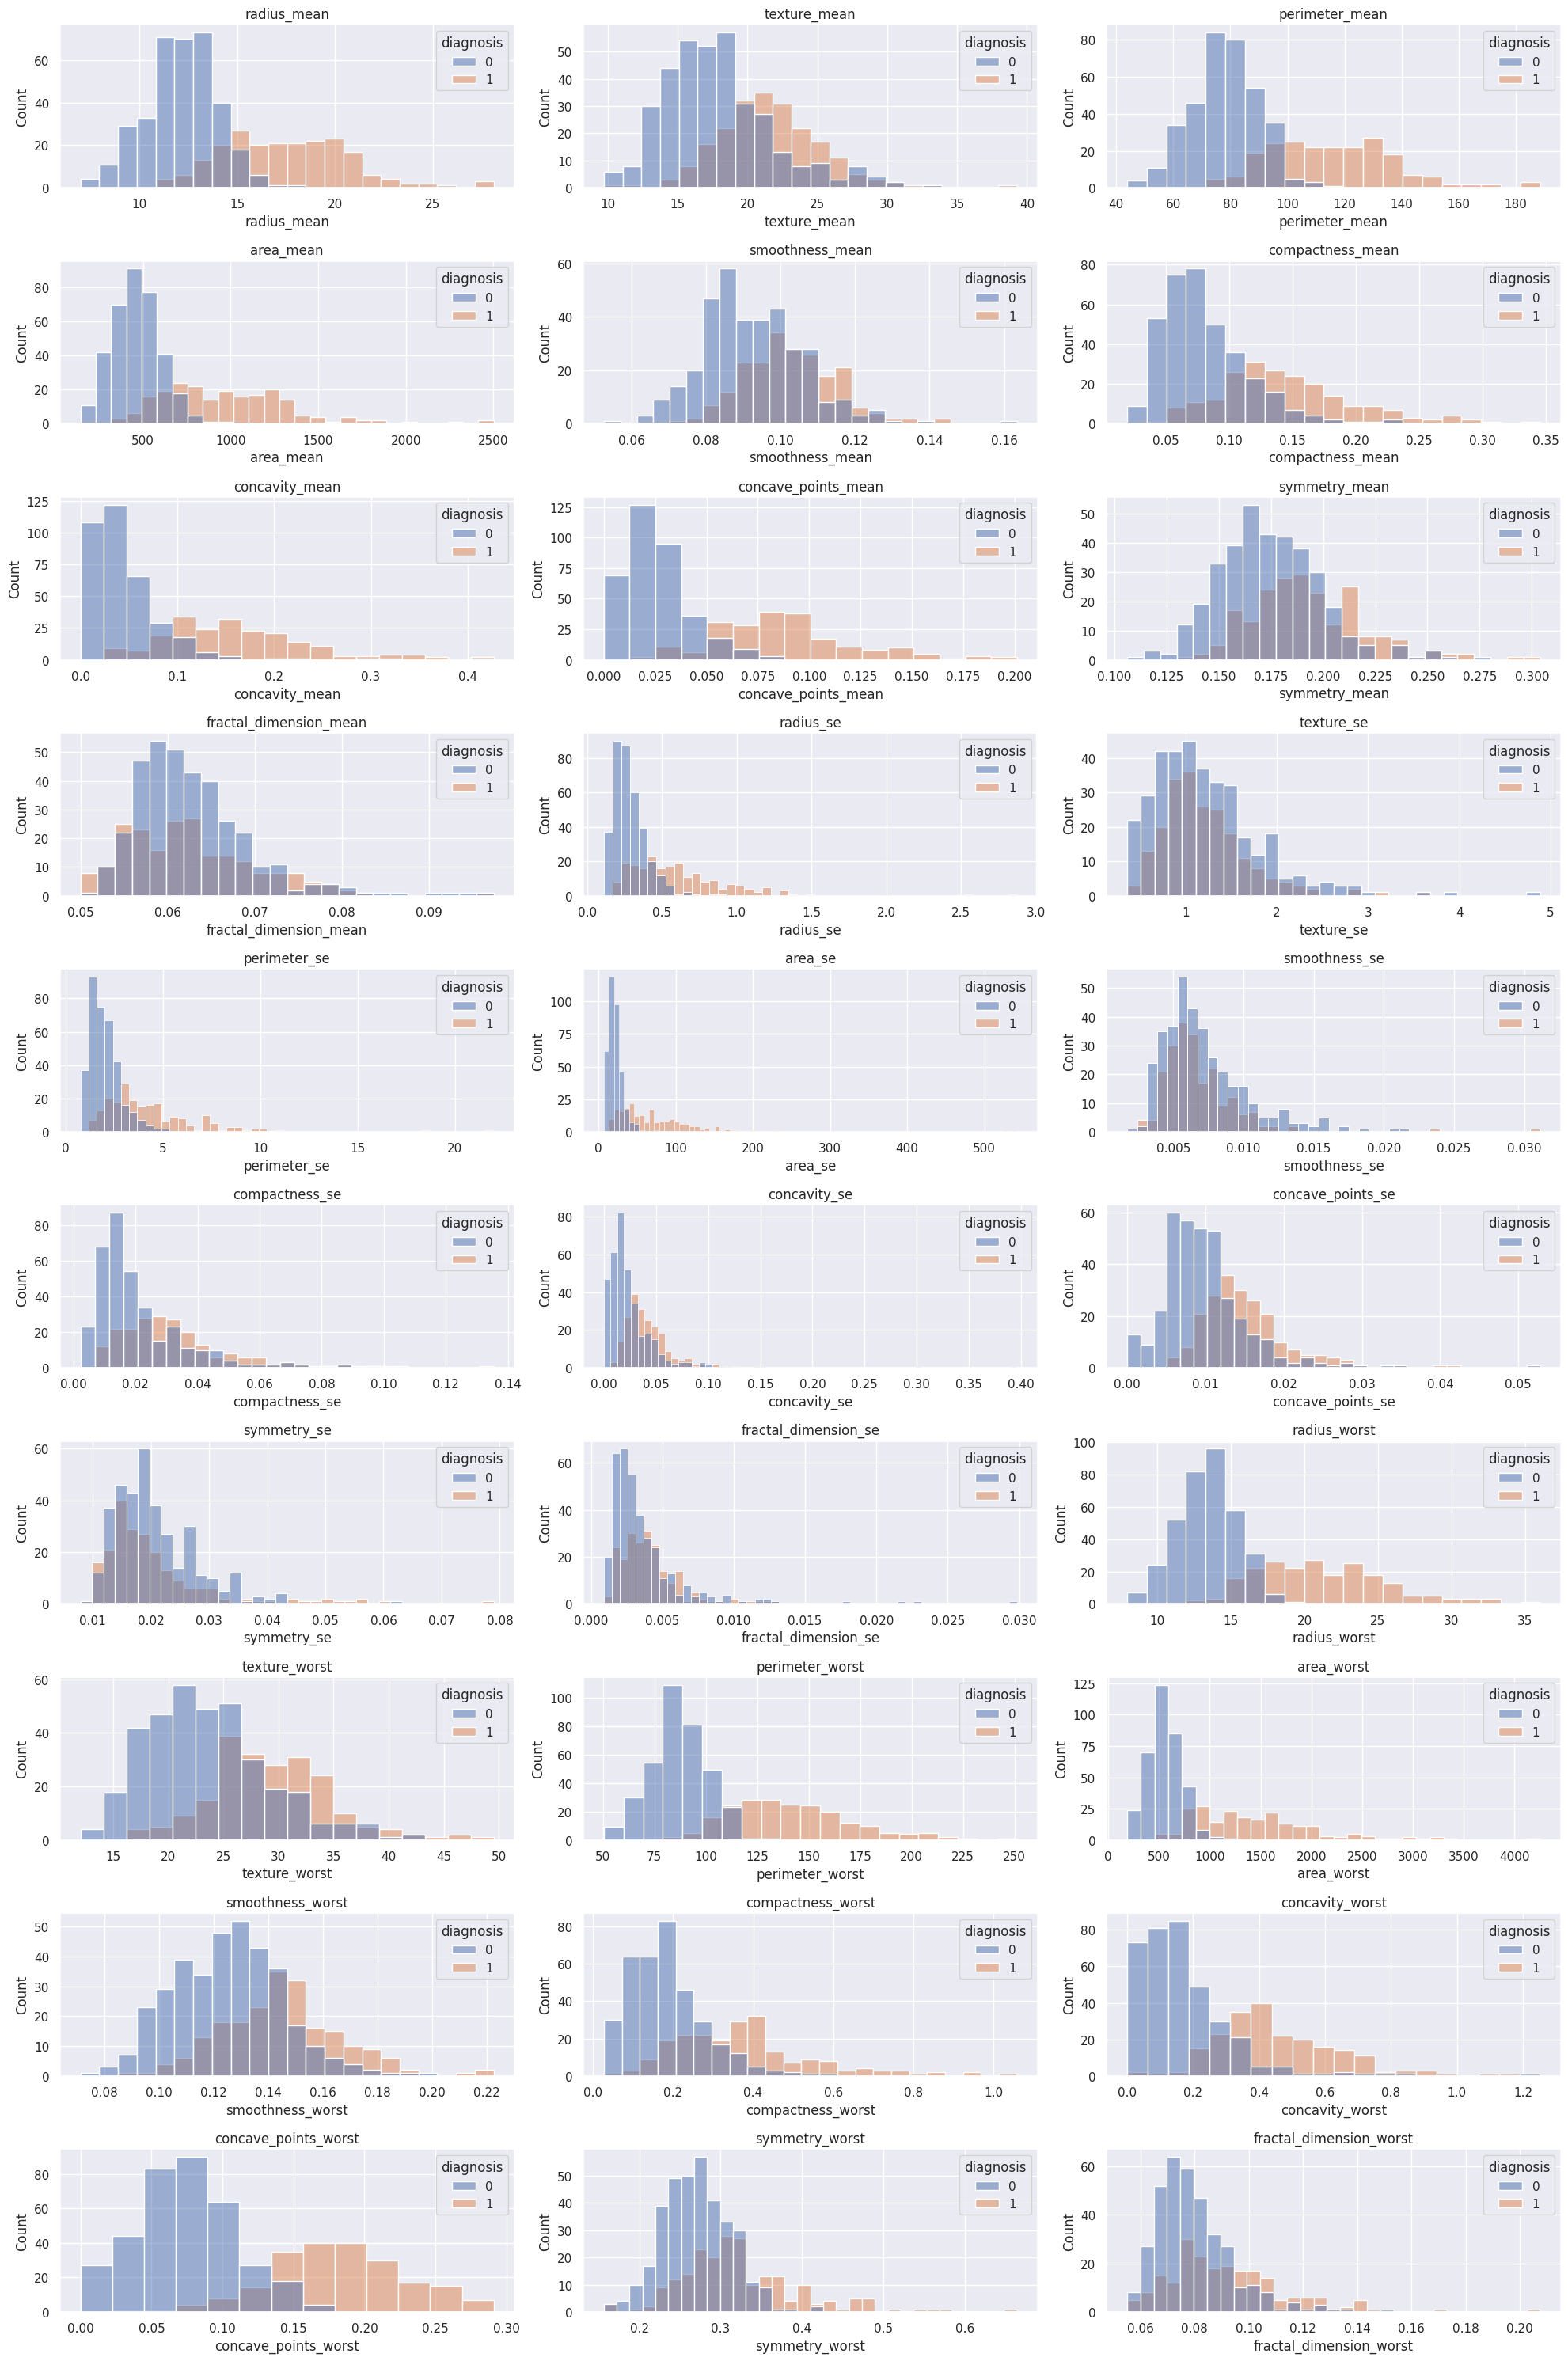

In [58]:
# Show the mean and se in diffrent features. We can see the texture and smoothness has close relationship with the diagnosis.
num_list=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
fig = plt.figure(figsize=(20,30))

for i in range(len(num_list)):
    plt.subplot(10,3,i+1)
    plt.title(num_list[i])
    sns.histplot(data=df,x=df[num_list[i]],hue='diagnosis')

plt.tight_layout()

Evalate the model performance using K-fold cross validation

In [59]:
# Create a function and use the KFold.
def model(model,data,prediction,outcome):
    kf = KFold(n_splits=10,shuffle=False)

In [60]:
# Create a function to show the cross-validation score in diffrent model(use imported libraries )
def classification_model(model,data,prediction_input,output):
    model.fit(data[prediction_input],data[output])
    predictions = model.predict(data[prediction_input])
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    kf = KFold(n_splits=5,shuffle=True, random_state=1)
    error = []
    for train, test in kf.split(data):
        train_X = (data[prediction_input].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    print(error)

In [61]:
# Model DecisionTreeClassifier, the performance will change
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
outcome_var= "diagnosis"
classification_model(model,df,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 84.211%
Cross-Validation Score : 85.965%
Cross-Validation Score : 85.965%
Cross-Validation Score : 87.719%
Cross-Validation Score : 88.229%
[0.8421052631578947, 0.8771929824561403, 0.8596491228070176, 0.9298245614035088, 0.9026548672566371]


In [63]:
# Model SVC, the performance will change
model = svm.SVC()
classification_model(model,df,prediction_var,outcome_var)

Accuracy : 89.631%
Cross-Validation Score : 88.596%
Cross-Validation Score : 88.596%
Cross-Validation Score : 87.719%
Cross-Validation Score : 89.254%
Cross-Validation Score : 88.926%
[0.8859649122807017, 0.8859649122807017, 0.8596491228070176, 0.9385964912280702, 0.8761061946902655]


In [64]:
# Model KNeighborsClassifier, the performance will change
model = KNeighborsClassifier()
classification_model(model,df,prediction_var,outcome_var)

Accuracy : 92.970%
Cross-Validation Score : 85.088%
Cross-Validation Score : 86.842%
Cross-Validation Score : 87.135%
Cross-Validation Score : 88.596%
Cross-Validation Score : 89.107%
[0.8508771929824561, 0.8859649122807017, 0.8771929824561403, 0.9298245614035088, 0.911504424778761]


In [66]:
# Model RandomFrorestClassfier, the performance will change
model = RandomForestClassifier(n_estimators=100)
classification_model(model,df,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 91.228%
Cross-Validation Score : 91.667%
Cross-Validation Score : 90.643%
Cross-Validation Score : 91.447%
Cross-Validation Score : 92.450%
[0.9122807017543859, 0.9210526315789473, 0.8859649122807017, 0.9385964912280702, 0.9646017699115044]


In [68]:
# Model LogisticRegression, the performance will change
model=LogisticRegression()
classification_model(model,df,prediction_var,outcome_var)

Accuracy : 89.807%
Cross-Validation Score : 86.842%
Cross-Validation Score : 89.912%
Cross-Validation Score : 88.596%
Cross-Validation Score : 89.693%
Cross-Validation Score : 89.984%
[0.868421052631579, 0.9298245614035088, 0.8596491228070176, 0.9298245614035088, 0.911504424778761]


In [76]:
data_X= df[prediction_var]
data_y= df["diagnosis"]

In [75]:
#  We can set up the parameter and estimator, best score.
# Define a function to show after cross validation the models performance.
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    clf.fit(train_X,train_y)
    print("The best parameter found on development set is :")
    print(clf.best_params_)
    print("the best estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    print(clf.best_score_)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
# Find the best parameters in the dataset.
# Show the best parameters with DecisionTreeClassfier, the accuracy is 0.9193589743589744
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 10}
the best estimator is 
DecisionTreeClassifier(max_features='log2', min_samples_leaf=6,
                       min_samples_split=10)
The best score is 
0.9193589743589744


In [74]:
# KNeighborsClassifie model with best parameters.
# Show the best parameters with KNeighborsClassifie model, the accuracy is 0.9193589743589744
model = KNeighborsClassifier()
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)


The best parameter found on development set is :
{'leaf_size': 1, 'n_neighbors': 14, 'weights': 'uniform'}
the best estimator is 
KNeighborsClassifier(leaf_size=1, n_neighbors=14)
The best score is 
0.9068589743589743
